# Ensembles

In [25]:
# Get basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use("fivethirtyeight")

In [26]:
# Figure Customization
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['image.cmap'] = 'viridis'

In [41]:
# Font Settings
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '18'

In [27]:
# Save Figure Customization
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.4

In [74]:
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.labelpad'] = 10
#plt.rcParams['axes3d.grid'] = False

In [90]:
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["grid.linewidth"] = 0.3
plt.rcParams["grid.color"] = (0.5, 0.5, 0.5, 0.5)

In [88]:
# Tick Customization
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.pad'] = 10.0
plt.rcParams['ytick.major.pad'] = 10.0
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8

In [83]:
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            #ax.spines['right'].set_color('none')
            #ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

In [46]:
# Get Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Create metrics to store
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [48]:
# Create datasets for demo
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [57]:
X10, y = make_classification(n_samples = 1000, n_features=10, n_redundant=0, 
                             n_informative=10, random_state=123, n_classes = 2)

In [58]:
X = PCA(n_components=2).fit_transform(X10)
X = StandardScaler().fit_transform(X)

In [59]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [97]:
# Initiate the Base Classifiers
names = [
    "Logistic Regression",
    "Naive Bayes",
    "ML Perceptron",
    "Decision Tree",
    "Nearest Neighbour"
]

classifiers = [
    LogisticRegression(),
    GaussianNB(),
    MLPClassifier(alpha=1),
    DecisionTreeClassifier(random_state=0), 
    KNeighborsClassifier(n_neighbors=3)
]

In [98]:
# Create mesh points for plotting the boundaries
step = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),np.arange(y_min, y_max, step))
xxyy = np.c_[xx.ravel(), yy.ravel()]

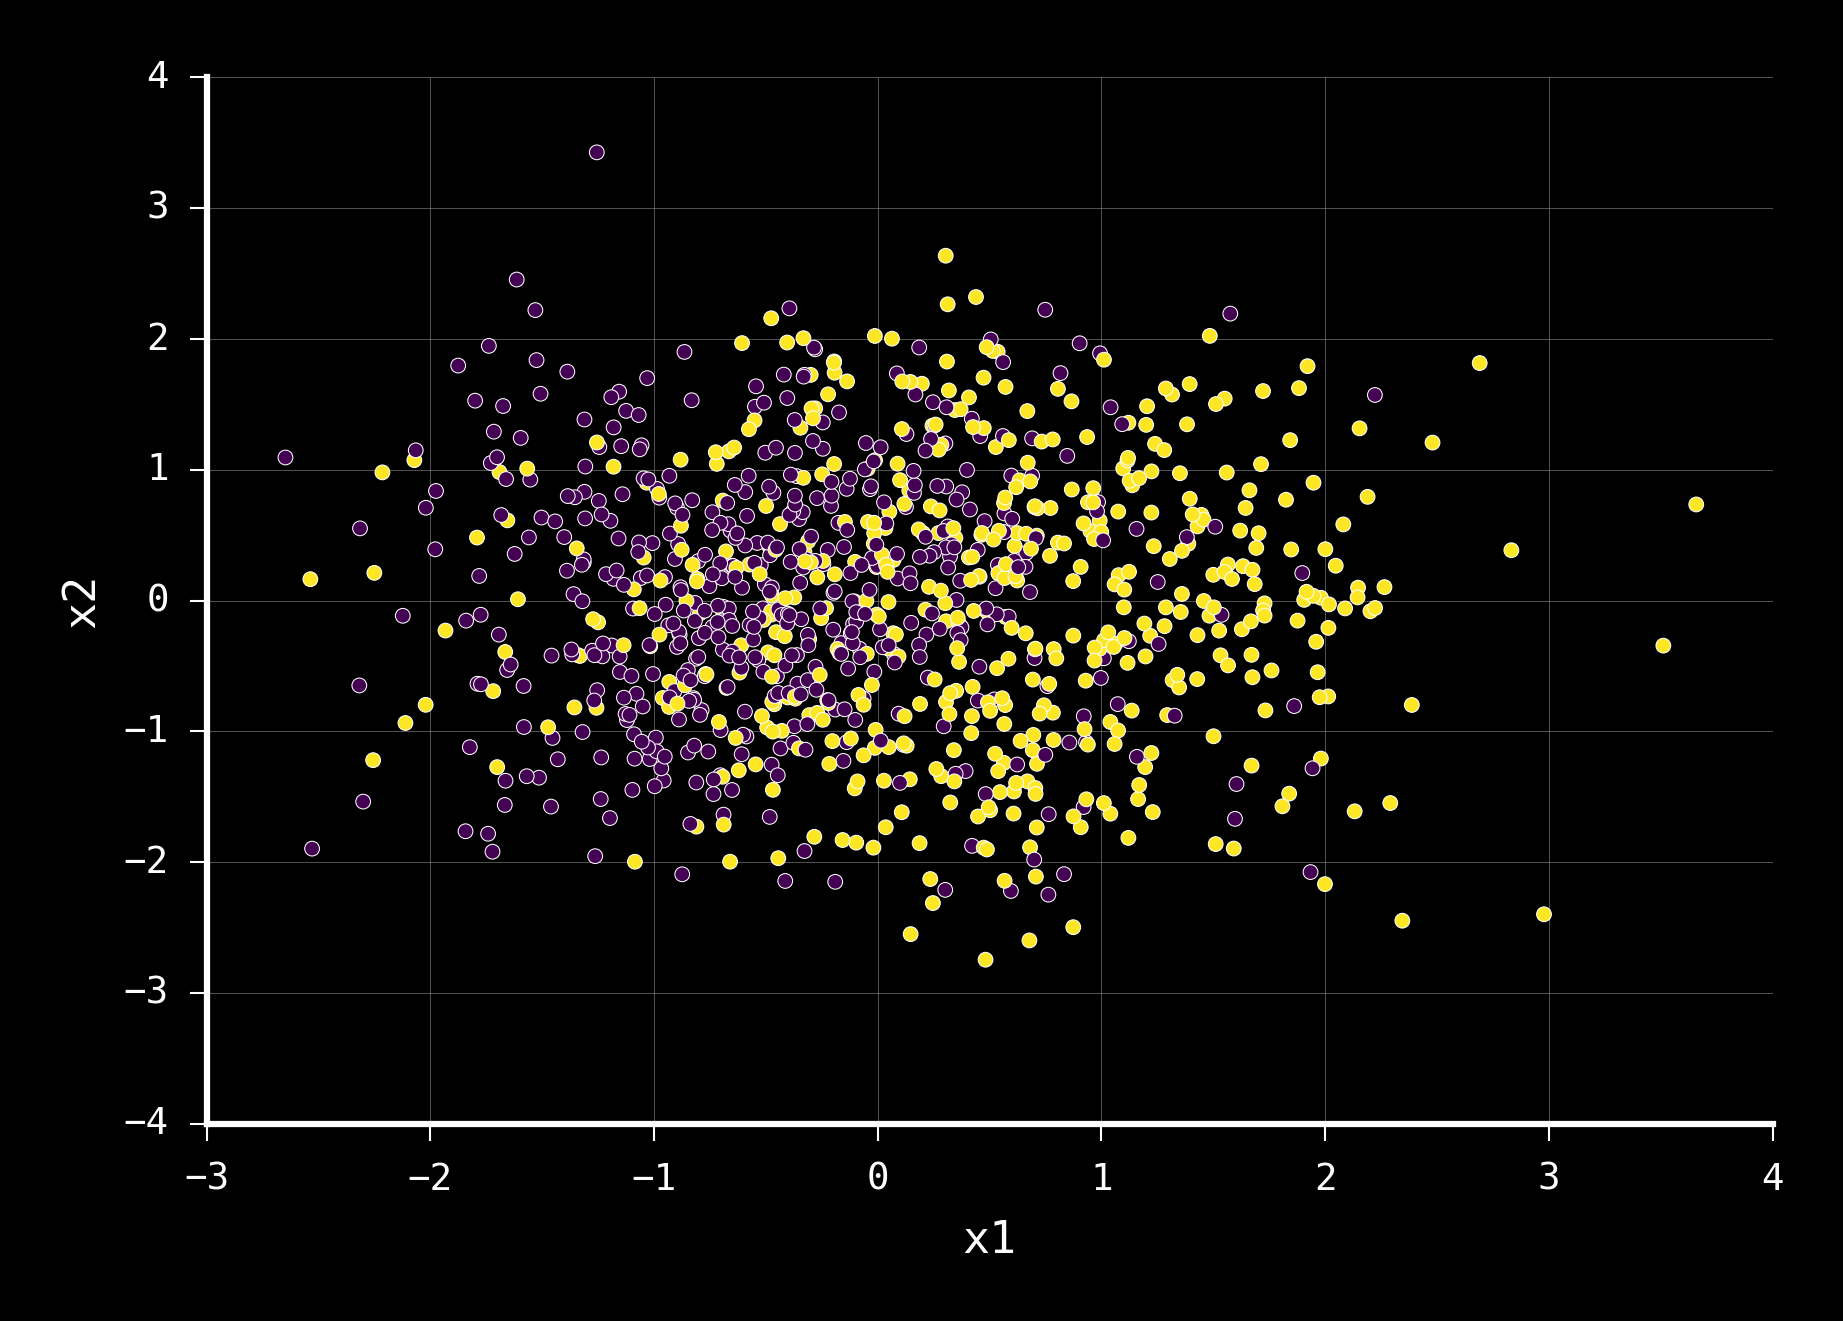

In [99]:
# Lets plot the data set
plt.scatter(X[:,0], X[:,1], c=y, s=50)
plt.xlabel("x1")
plt.ylabel("x2")
hide_spines()
plt.savefig("img/fig_00_data.png")

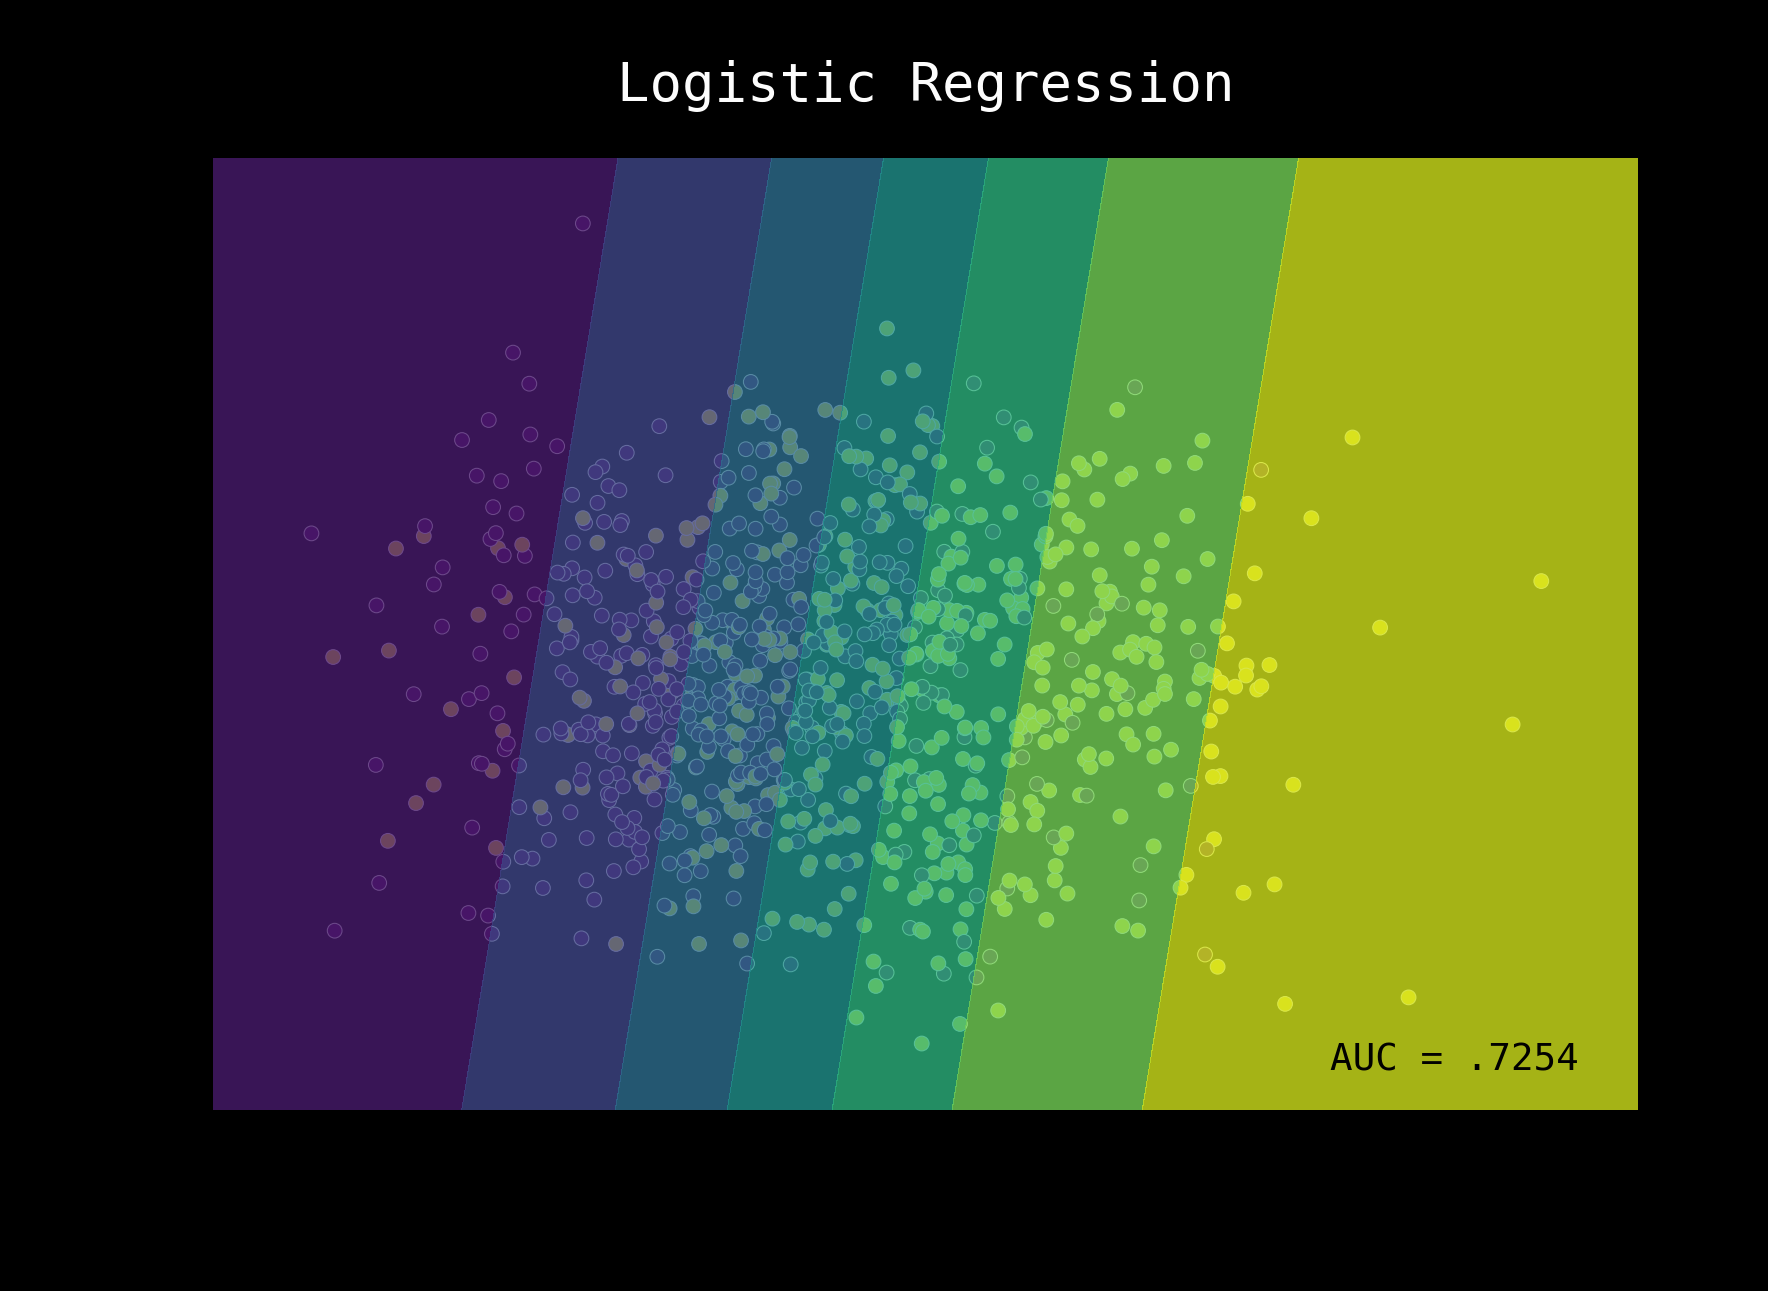

In [104]:
# Make a simple model - Logistics Regression
idx = 0
clf = classifiers[idx]
clf.fit(X_train, y_train)
y_pred[:,idx] = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred[:,idx])
        
Z = clf.predict_proba(xxyy)[:, 1]
Z = Z.reshape(xx.shape)

plt.scatter(X[:,0], X[:,1], c=y, s=50)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.title(names[idx])
plt.text(xx.max() - .3, yy.min() + .3, 'AUC = '+ ('%.4f' % auc).lstrip('0'), size=18,
        horizontalalignment='right', color = "black")
plt.axis("off")
idx += 1
plt.savefig("img/fig_01_simple.png")

In [94]:
np.arange(1,5)

array([1, 2, 3, 4])

In [62]:
# Create array to store the predictions
y_pred = np.empty([y_test.shape[0],6])

CPU times: user 3.49 s, sys: 144 ms, total: 3.64 s
Wall time: 3.09 s


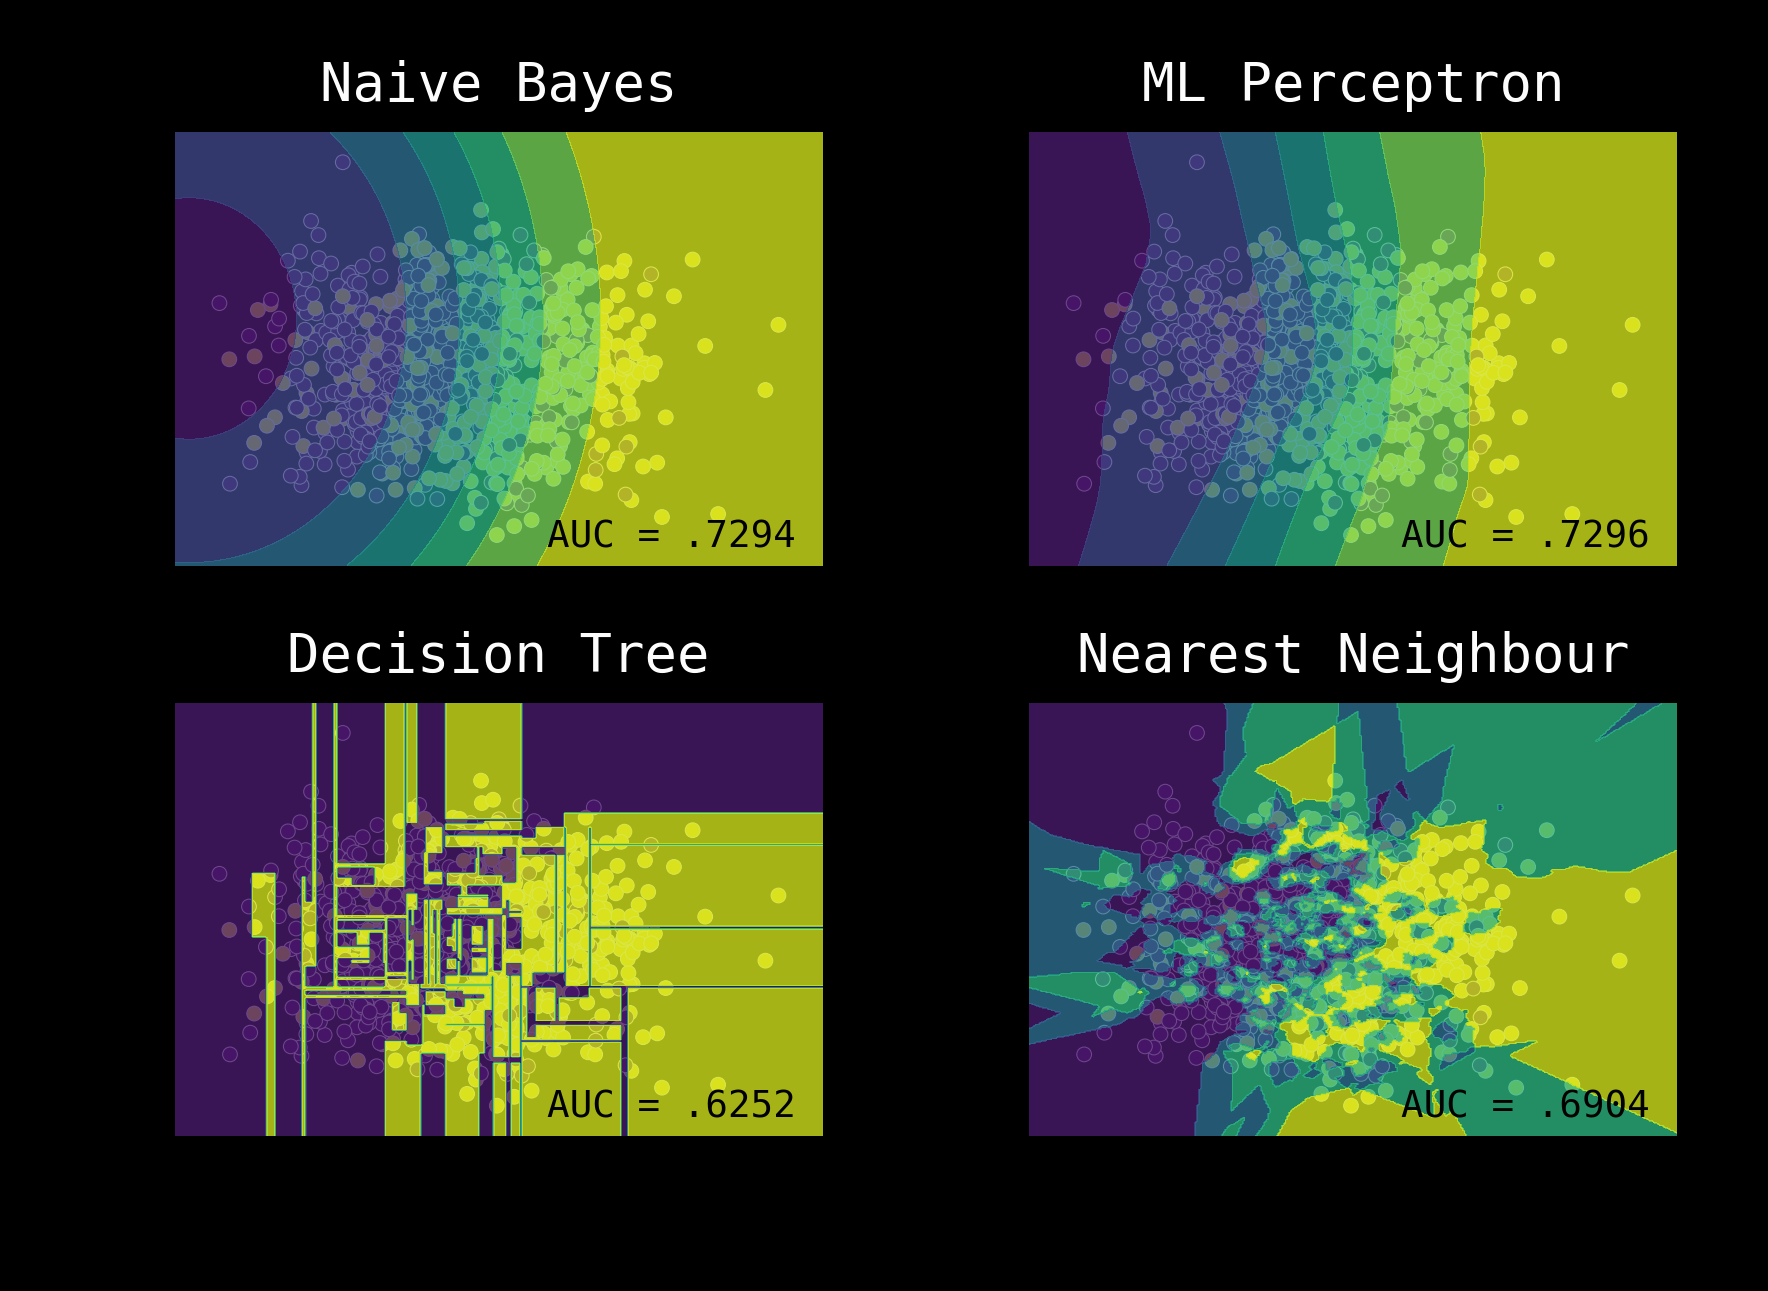

In [105]:
%%time
# Run the classifier, score and plot them
for idx in np.arange(1,5):
    clf = classifiers[idx]
    clf.fit(X_train, y_train)
    y_pred[:,idx] = clf.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, y_pred[:,idx])
        
    Z = clf.predict_proba(xxyy)[:, 1]
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 2, idx)
    plt.scatter(X[:,0], X[:,1], c=y, s=50)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.title(names[idx])
    plt.text(xx.max() - .3, yy.min() + .3, 'AUC = ' + ('%.4f' % auc).lstrip('0'), size=18,
        horizontalalignment='right', color = "black")
    plt.axis("off")
    idx += 1
plt.savefig("img/fig_02_many.png")

In [38]:
y_ensemble = np.sum(y_pred, axis = 1)/y_pred.shape[1]

In [13]:
roc_auc_score(y_test, y_ensemble)

0.77606736753700933

In [ ]:
# Initiate the Base Classifiers
names = [
    "Naive Bayes",
    "ML Perceptron",
    "Nearest Neighbors",
    "Logistic Regression",
    "Random Forest",
    "Gradient Boosting"]

classifiers = [
    GaussianNB(),
    MLPClassifier(alpha=1),
    KNeighborsClassifier(3, n_jobs=-1),  
    LogisticRegression(n_jobs=-1),
    RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1),
    GradientBoostingClassifier(max_depth=3, n_estimators=10)
]